# Importing the required libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation    
  
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load raw data

In [64]:
data = pd.read_csv("/Users/miaya/Documents/Documents - Mia’s MacBook Pro/MScA/Fall 23/32021 Machine Learning Operations/Week 2/Assignment 1/athletes.csv") # change to dagshub location later 
print(data.shape)
print(data.dtypes)

(423006, 27)
athlete_id    float64
name           object
region         object
team           object
affiliate      object
gender         object
age           float64
height        float64
weight        float64
fran          float64
helen         float64
grace         float64
filthy50      float64
fgonebad      float64
run400        float64
run5k         float64
candj         float64
snatch        float64
deadlift      float64
backsq        float64
pullups       float64
eat            object
train          object
background     object
experience     object
schedule       object
howlong        object
dtype: object


# Data preparation for v1

1. Load initial dataset (v1)

In [80]:
data_v1 = data

2. Calculate total_lift

In [81]:
data_v1['total_lift'] = data_v1['deadlift'] + data_v1['candj'] + data_v1['snatch'] + data_v1['backsq']

3. Drop na/missing values

In [82]:
data_v1 = data_v1.dropna()
data_v1.shape

(1198, 28)

4. Feature engineering - Encode categorical variables

In [ ]:
# Display unique categories in each categorical variable
cat_var = ["region", "team", "affiliate", "gender", "howlong"]

for var in cat_var:
    unique_cat = data_v1[var].unique()
    print(f'Unique categories in {var}: {unique_cat}')

In [83]:
# encode categorical variables (region, gender)
data_v1 = pd.get_dummies(data_v1, columns=['region', 'gender'])
data_v1.head(5)

,athlete_id,name,team,affiliate,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,total_lift,region_Africa,region_Asia,region_Australia,region_Canada East,region_Canada West,region_Central East,region_Europe,region_Latin America,region_Mid Atlantic,region_North Central,region_North East,region_North West,region_Northern California,region_South Central,region_South East,region_South West,region_Southern California,gender_Female,gender_Male
102,2720.0,Justin Adams,Woodward CrossFit,Woodward CrossFit,24.0,68.0,180.0,126.0,449.0,86.0,988.0,425.0,58.0,1302.0,315.0,240.0,475.0,405.0,80.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,1435.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
110,6922.0,Daniel Adamson,CrossFit The Point,CrossFit The Point,31.0,67.0,150.0,244.0,486.0,294.0,1217.0,330.0,63.0,1268.0,230.0,175.0,410.0,330.0,42.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I do multipl...,2-4 years|,1145.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
116,12563.0,Steven Lee Adams,CrossFit Kaiju,CrossFit Kaiju,37.0,72.0,210.0,162.0,482.0,143.0,1243.0,366.0,66.0,1320.0,285.0,205.0,525.0,425.0,49.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|I ty...,4+ years|,1440.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
238,24943.0,Greg Adler,CrossFit Fairfax,CrossFit Fairfax,44.0,73.0,184.0,317.0,586.0,217.0,1551.0,311.0,74.0,1454.0,190.0,155.0,405.0,255.0,31.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,4+ years|,1005.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
304,3066.0,Luke Ahlfield,CrossFit Homer Glen,CrossFit Homer Glen,31.0,72.0,215.0,146.0,510.0,98.0,978.0,421.0,65.0,1365.0,305.0,255.0,455.0,386.0,50.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I strictly schedule my rest days|,2-4 years|,1401.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


5. Drop irrelevant variables

In [84]:
data_v1 = data_v1.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                              'filthy50','fgonebad','run400','run5k','pullups','train', 'schedule', 'experience', 'background', 'eat', 'howlong'])
data_v1.dtypes

age                           float64
height                        float64
weight                        float64
candj                         float64
snatch                        float64
deadlift                      float64
backsq                        float64
total_lift                    float64
region_Africa                   uint8
region_Asia                     uint8
region_Australia                uint8
region_Canada East              uint8
region_Canada West              uint8
region_Central East             uint8
region_Europe                   uint8
region_Latin America            uint8
region_Mid Atlantic             uint8
region_North Central            uint8
region_North East               uint8
region_North West               uint8
region_Northern California      uint8
region_South Central            uint8
region_South East               uint8
region_South West               uint8
region_Southern California      uint8
gender_Female                   uint8
gender_Male 

# Exploratory Data Analysis (EDA) on v1

1. frequency counts

Text(0.5, 0, 'Age')

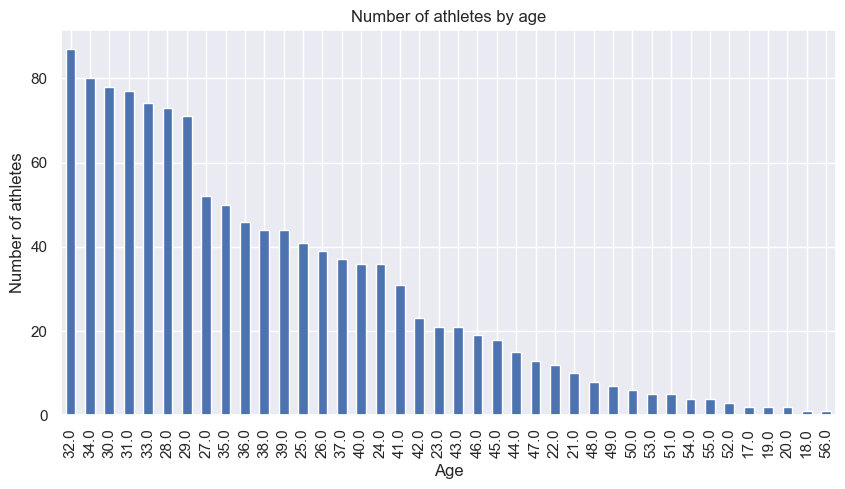

In [85]:
# age counts
data_v1["age"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of athletes by age")
plt.ylabel('Number of athletes')
plt.xlabel('Age')

Text(0.5, 0, 'Height')

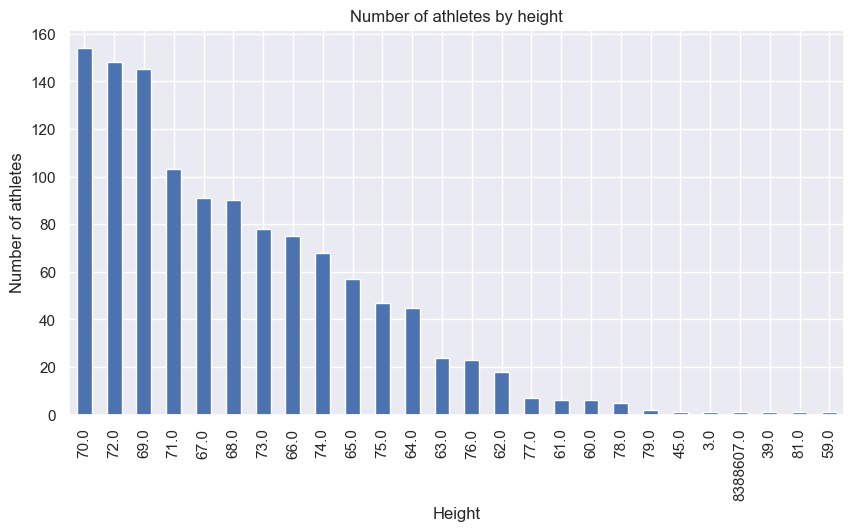

In [86]:
# height counts
data_v1["height"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of athletes by height")
plt.ylabel('Number of athletes')
plt.xlabel('Height')

Text(0.5, 0, 'Gender(0:male, 1:female)')

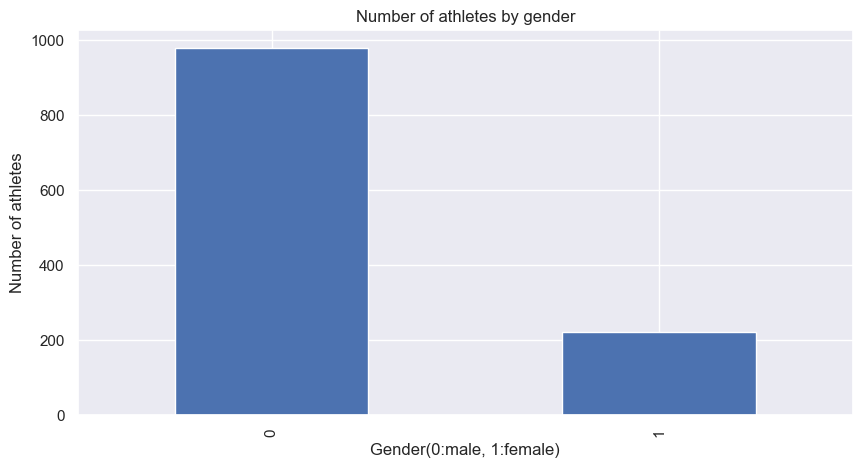

In [87]:
# gender counts
data_v1["gender_Female"].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of athletes by gender")
plt.ylabel('Number of athletes')
plt.xlabel('Gender(0:male, 1:female)')

2. Scatterplots

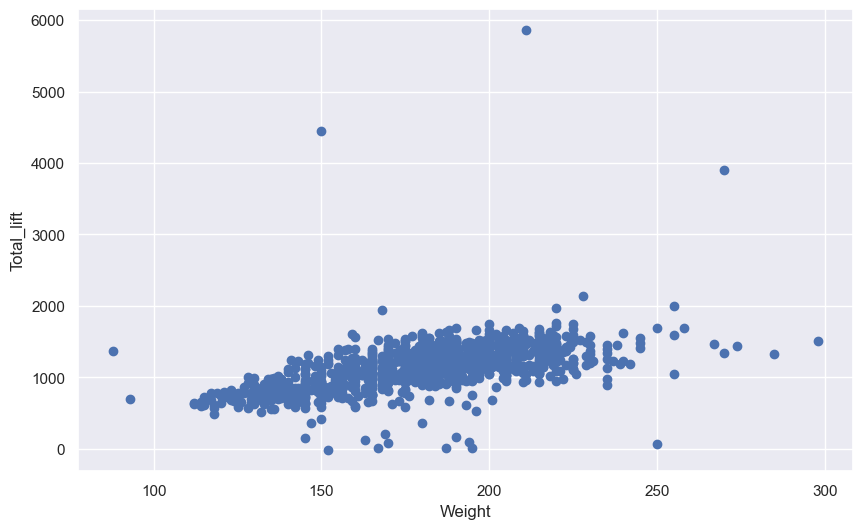

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_v1["weight"], data_v1['total_lift'])
ax.set_xlabel('Weight')
ax.set_ylabel('Total_lift')
plt.show()

3. correlation heat map

,age,height,weight,candj,snatch,deadlift,backsq,total_lift,region_Africa,region_Asia,region_Australia,region_Canada East,region_Canada West,region_Central East,region_Europe,region_Latin America,region_Mid Atlantic,region_North Central,region_North East,region_North West,region_Northern California,region_South Central,region_South East,region_South West,region_Southern California,gender_Female,gender_Male
age,1.000000,-0.035779,0.015724,-0.173107,-0.173571,-0.122425,-0.140301,-0.163820,-0.075687,-0.026005,0.012069,0.055448,0.034837,0.001690,-0.058245,-0.102063,-0.018455,0.044353,-0.003621,-0.006669,0.037143,-0.073064,0.061668,-0.009158,0.000960,0.028406,-0.028406
height,-0.035779,1.000000,0.006203,-0.082538,-0.068432,-0.104873,-0.097641,-0.099134,-0.002050,-0.003255,0.125877,-0.005710,-0.005775,-0.007416,-0.006156,-0.003766,-0.008238,-0.010343,-0.008959,-0.007627,-0.007254,-0.008433,-0.010214,-0.008089,-0.008039,-0.013717,0.013717
weight,0.015724,0.006203,1.000000,0.449040,0.382020,0.547223,0.566886,0.544171,0.025347,-0.057207,0.010742,-0.021408,-0.008913,-0.018426,0.000376,-0.009124,-0.008691,0.044208,-0.013919,0.023753,0.040754,0.048196,0.007970,-0.034357,-0.063099,-0.652827,0.652827
candj,-0.173107,-0.082538,0.449040,1.000000,0.961680,0.881540,0.655453,0.949805,0.028112,0.071403,0.046364,-0.023314,-0.024490,-0.000133,-0.015547,-0.008328,-0.017542,0.016365,-0.017630,-0.010890,0.024995,0.051464,-0.027155,-0.027839,-0.013603,-0.440455,0.440455
snatch,-0.173571,-0.068432,0.382020,0.961680,1.000000,0.813977,0.568239,0.901545,0.020047,0.081378,0.059023,-0.029535,-0.015395,0.005371,-0.014586,-0.012757,-0.018785,0.008717,-0.017443,-0.008504,0.018986,0.046643,-0.035736,-0.030819,-0.000133,-0.380529,0.380529
deadlift,-0.122425,-0.104873,0.547223,0.881540,0.813977,1.000000,0.759792,0.956136,-0.004809,0.031888,0.012414,-0.031398,-0.020829,0.001956,0.014254,-0.008656,-0.004874,0.026007,-0.019572,-0.033748,0.041083,0.056336,-0.020337,-0.019925,-0.017830,-0.543099,0.543099
backsq,-0.140301,-0.097641,0.566886,0.655453,0.568239,0.759792,1.000000,0.833808,0.044198,0.057365,-0.049477,-0.031354,-0.015794,-0.000713,-0.023048,-0.018236,0.000266,0.022919,0.019758,-0.018723,0.041633,0.052062,-0.021835,-0.024101,-0.005929,-0.533908,0.533908
total_lift,-0.163820,-0.099134,0.544171,0.949805,0.901545,0.956136,0.833808,1.000000,0.022742,0.063509,0.014793,-0.032036,-0.021054,0.001648,-0.009134,-0.013141,-0.010183,0.021297,-0.009124,-0.021254,0.036207,0.057171,-0.027985,-0.027539,-0.011006,-0.530796,0.530796
region_Africa,-0.075687,-0.002050,0.025347,0.028112,0.020047,-0.004809,0.044198,0.022742,1.000000,-0.007989,-0.016291,-0.014016,-0.014177,-0.018204,-0.015113,-0.009244,-0.020220,-0.025389,-0.021990,-0.018723,-0.017808,-0.020702,-0.025072,-0.019854,-0.019730,-0.003110,0.003110
region_Asia,-0.026005,-0.003255,-0.057207,0.071403,0.081378,0.031888,0.057365,0.063509,-0.007989,1.000000,-0.025856,-0.022246,-0.022501,-0.028893,-0.023986,-0.014672,-0.032093,-0.040296,-0.034901,-0.029716,-0.028263,-0.032857,-0.039793,-0.031511,-0.031315,-0.014630,0.014630


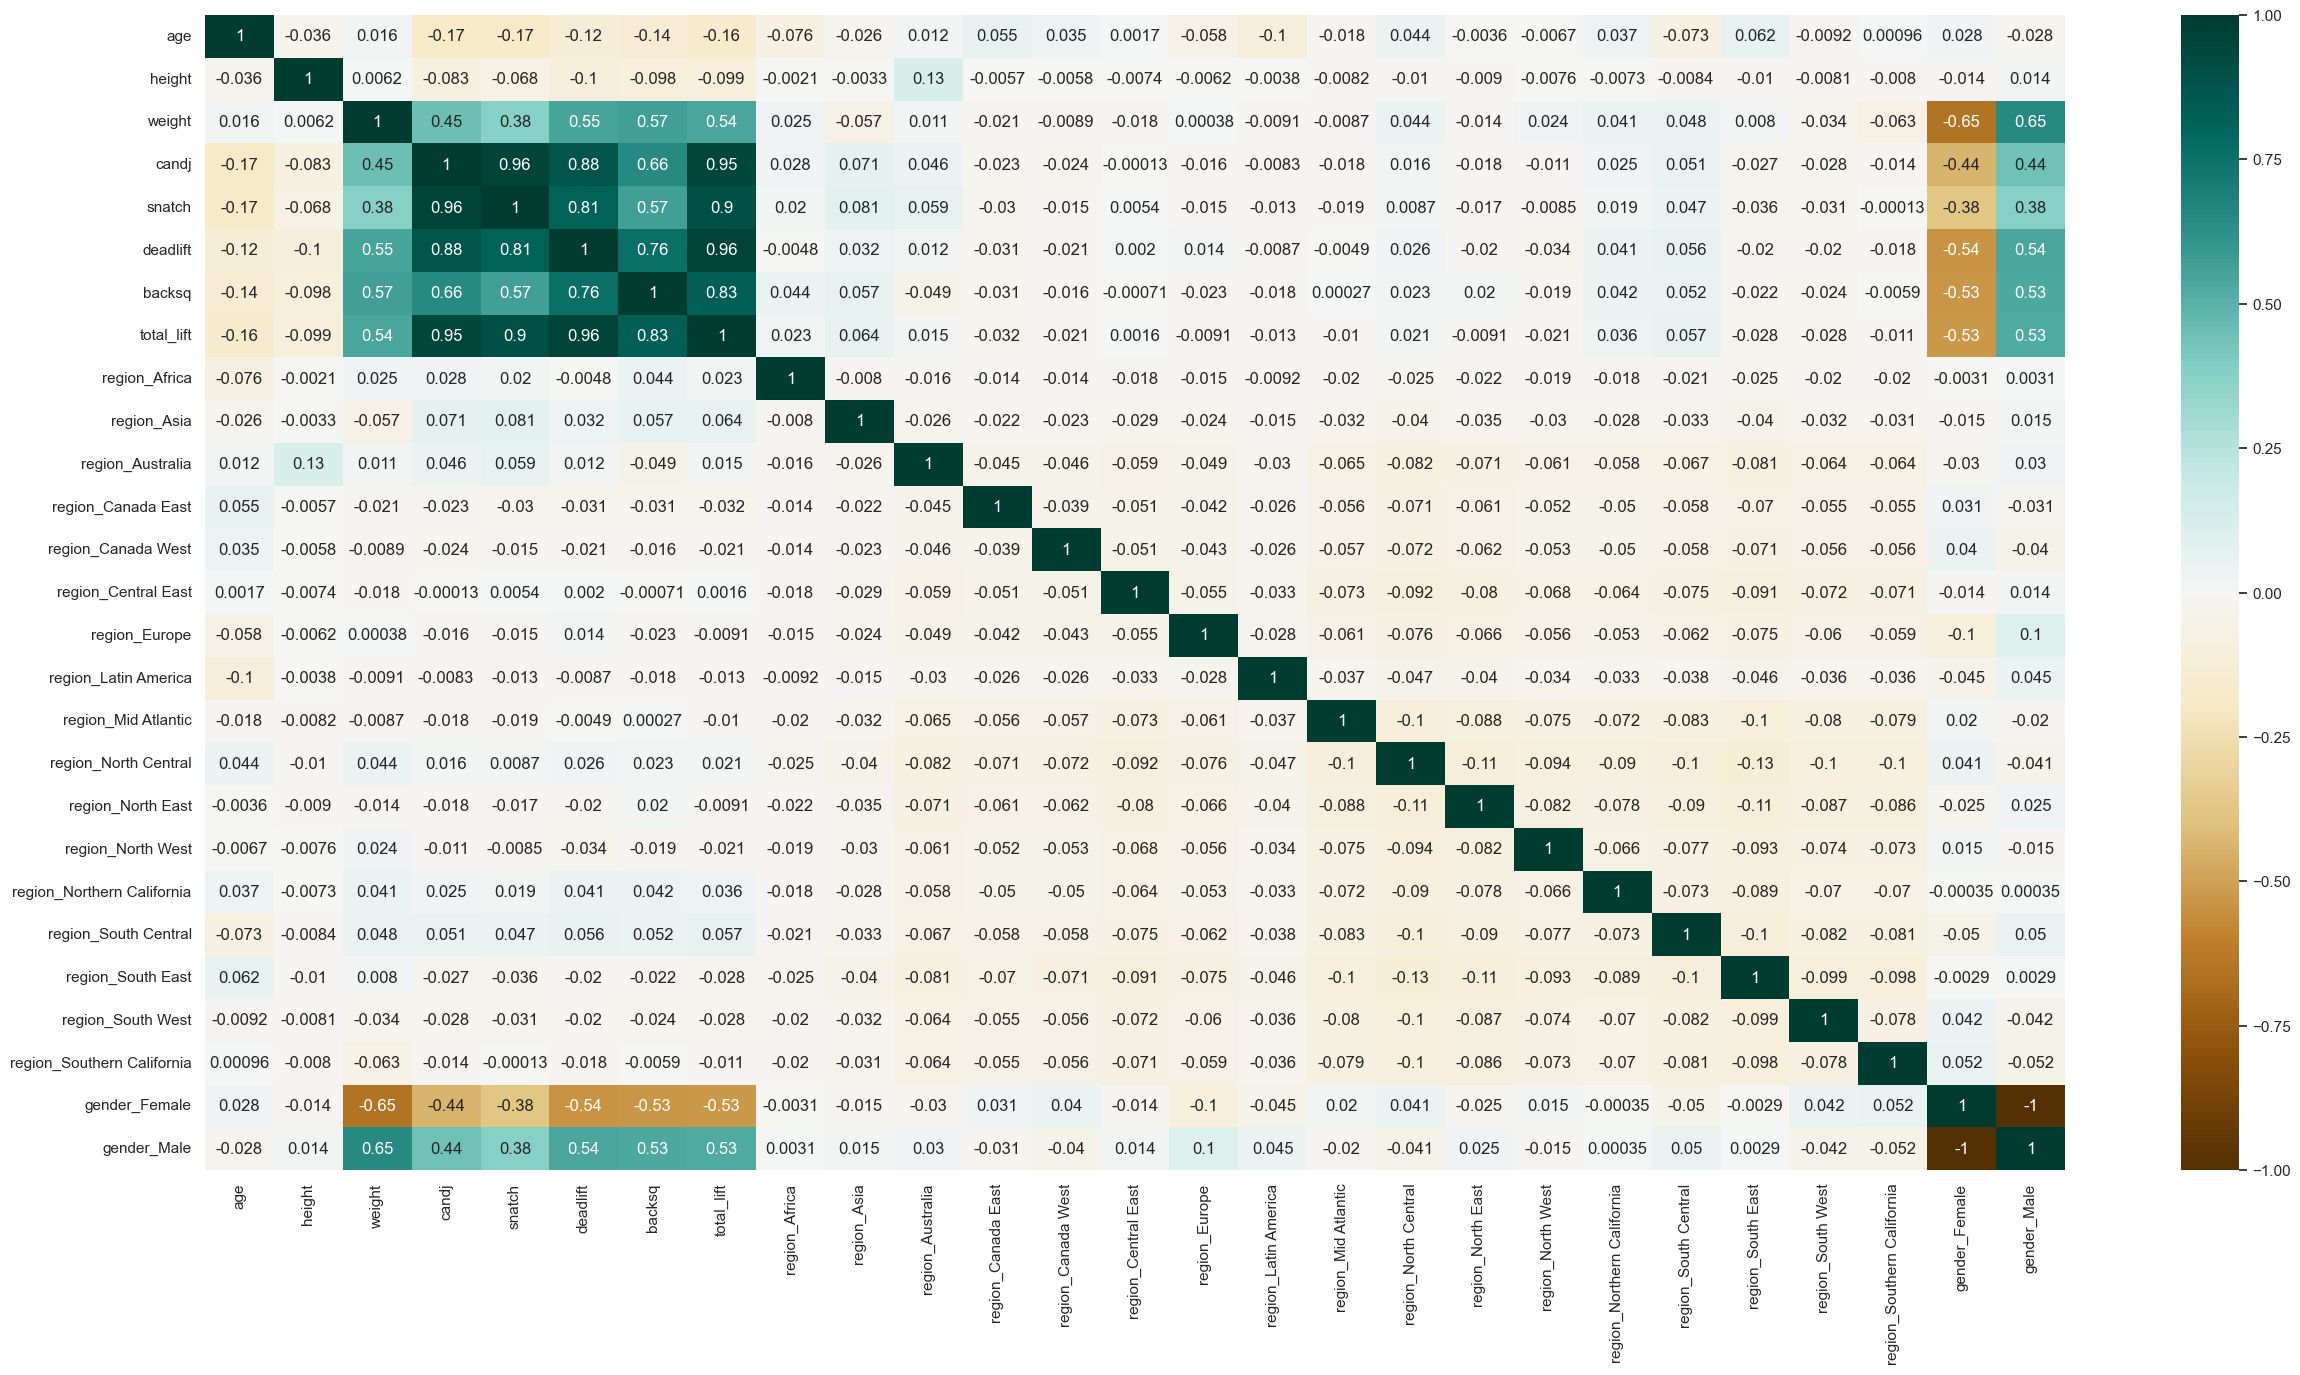

In [89]:
plt.figure(figsize=(30,15))
c= data_v1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Predict total_lift using v1

In [90]:
# Split data for data_v1
X_v1  = data_v1.drop('total_lift', axis=1)
y_v1 = data_v1['total_lift']
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.2, random_state=42) 

In [93]:
# Create a Linear Regression model
model_v1 = LinearRegression()

# Train the model
model_v1.fit(X_train_v1, y_train_v1)

# Make predictions
y_pred_v1 = model_v1.predict(X_test_v1)

# Evaluate the model
mse = mean_squared_error(y_test_v1, y_pred_v1)
r2 = r2_score(y_test_v1, y_pred_v1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6130297028450905e-19
R-squared: 1.0


# Data preparation for v2

copy from Monika

In [9]:
# Remove not relevant columns
data_v2 = df.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                               'train','background','experience','schedule','howlong', \
                               'deadlift','candj','snatch','backsq','experience',\
                               'background','schedule','howlong'])
data_v2 = data_v2.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                              'filthy50','fgonebad','run400','run5k','pullups','train'])

# Remove Outliers
df = df[df['weight'] < 1500]
df = df[df['gender'] != '--']
df = df[df['age'] >= 18]
df = df[(df['height'] < 96) & (df['height'] > 48)]

df = df[(df['deadlift'] > 0) & (df['deadlift'] <= 1105)|((df['gender'] == 'Female') \
                 & (df['deadlift'] <= 636))]
df = df[(df['candj'] > 0) & (df['candj'] <= 395)]
df = df[(df['snatch'] > 0) & (df['snatch'] <= 496)]
df = df[(df['backsq'] > 0) & (df['backsq'] <= 1069)]

# Clean Survey Df
decline_dict = {'Decline to answer|': np.nan}
df = df.replace(decline_dict)
df = df.dropna(subset=['background','experience','schedule','howlong','eat'])


In [10]:
# Dropping the duplicate rows
print(df.shape)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Used to count the number of rows
df.count() 
df = df.drop_duplicates() #drop duplicates
df.head(5)

# Used to count the number of rows after removing dup
df.count() 

(30029, 14)
number of duplicate rows:  (1, 14)


region        30028
gender        30028
age           30028
height        30028
weight        30028
candj         30028
snatch        30028
deadlift      30028
backsq        30028
eat           30028
background    30028
experience    30028
schedule      30028
howlong       30028
dtype: int64

In [13]:
# Dropping the missing or null values
print(df.isnull().sum()) # no missing values

region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
dtype: int64


5. Caluclate total_lift

In [ ]:
df["total_lift"] = df["candj"] + df["snatch"] + df["deadlift"]

In [15]:
df.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong
21,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|
22,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|
27,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|
50,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|
60,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|
